# BODY FAT ESTIMATOR

Content

The variables listed below, from left to right, are:

- Density determined from underwater weighing
- Percent body fat from Siri's (1956) equation
- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)

(Measurement standards are apparently those listed in Benhke and Wilmore (1974), pp. 45-48 where, for instance, the abdomen 2 circumference is measured "laterally, at the level of the iliac crests, and anteriorly, at the umbilicus".)

These data are used to produce the predictive equations for lean body weight given in the abstract "Generalized body composition prediction equation for men using simple measurement techniques", K.W. Penrose, A.G. Nelson, A.G. Fisher, FACSM, Human Performance Research Center, Brigham Young University, Provo, Utah 84602 as listed in Medicine and Science in Sports and Exercise, vol. 17, no. 2, April 1985, p. 189. (The predictive equation were obtained from the first 143 of the 252 cases that are listed below).

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pickle
%matplotlib inline
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bodyfat.csv')

In [3]:
df

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[252 rows x 15 columns]

In [4]:
df['Height'] = round((df['Height']*2.54),2)

In [5]:
df['Height'] 

0      172.08
1      183.52
2      168.28
3      183.52
4      180.98
        ...  
247    170.18
248    177.16
249    167.64
250    179.07
251    177.80
Name: Height, Length: 252, dtype: float64

In [6]:
df['Weight'] = round(df['Weight']/2.2,2)

In [7]:
df['Weight']

0      70.11
1      78.75
2      70.00
3      83.98
4      83.75
       ...  
247    61.02
248    91.36
249    84.89
250    86.70
251    94.32
Name: Weight, Length: 252, dtype: float64

In [8]:
df

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23   70.11  172.08  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22   78.75  183.52  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22   70.00  168.28  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26   83.98  183.52  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24   83.75  180.98  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70   61.02  170.18  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72   91.36  177.16  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72   84.89  167.64  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72   86.70  179.07  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74   94.32  177.80  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[252 rows x 15 columns]

In [9]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

#### Checking insights of data set


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [11]:
df.shape

(252, 15)

In [12]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

- There are total 252 entries
- There are no null values
- There are 15 columns in total and all numeric.

#### Plotting Features

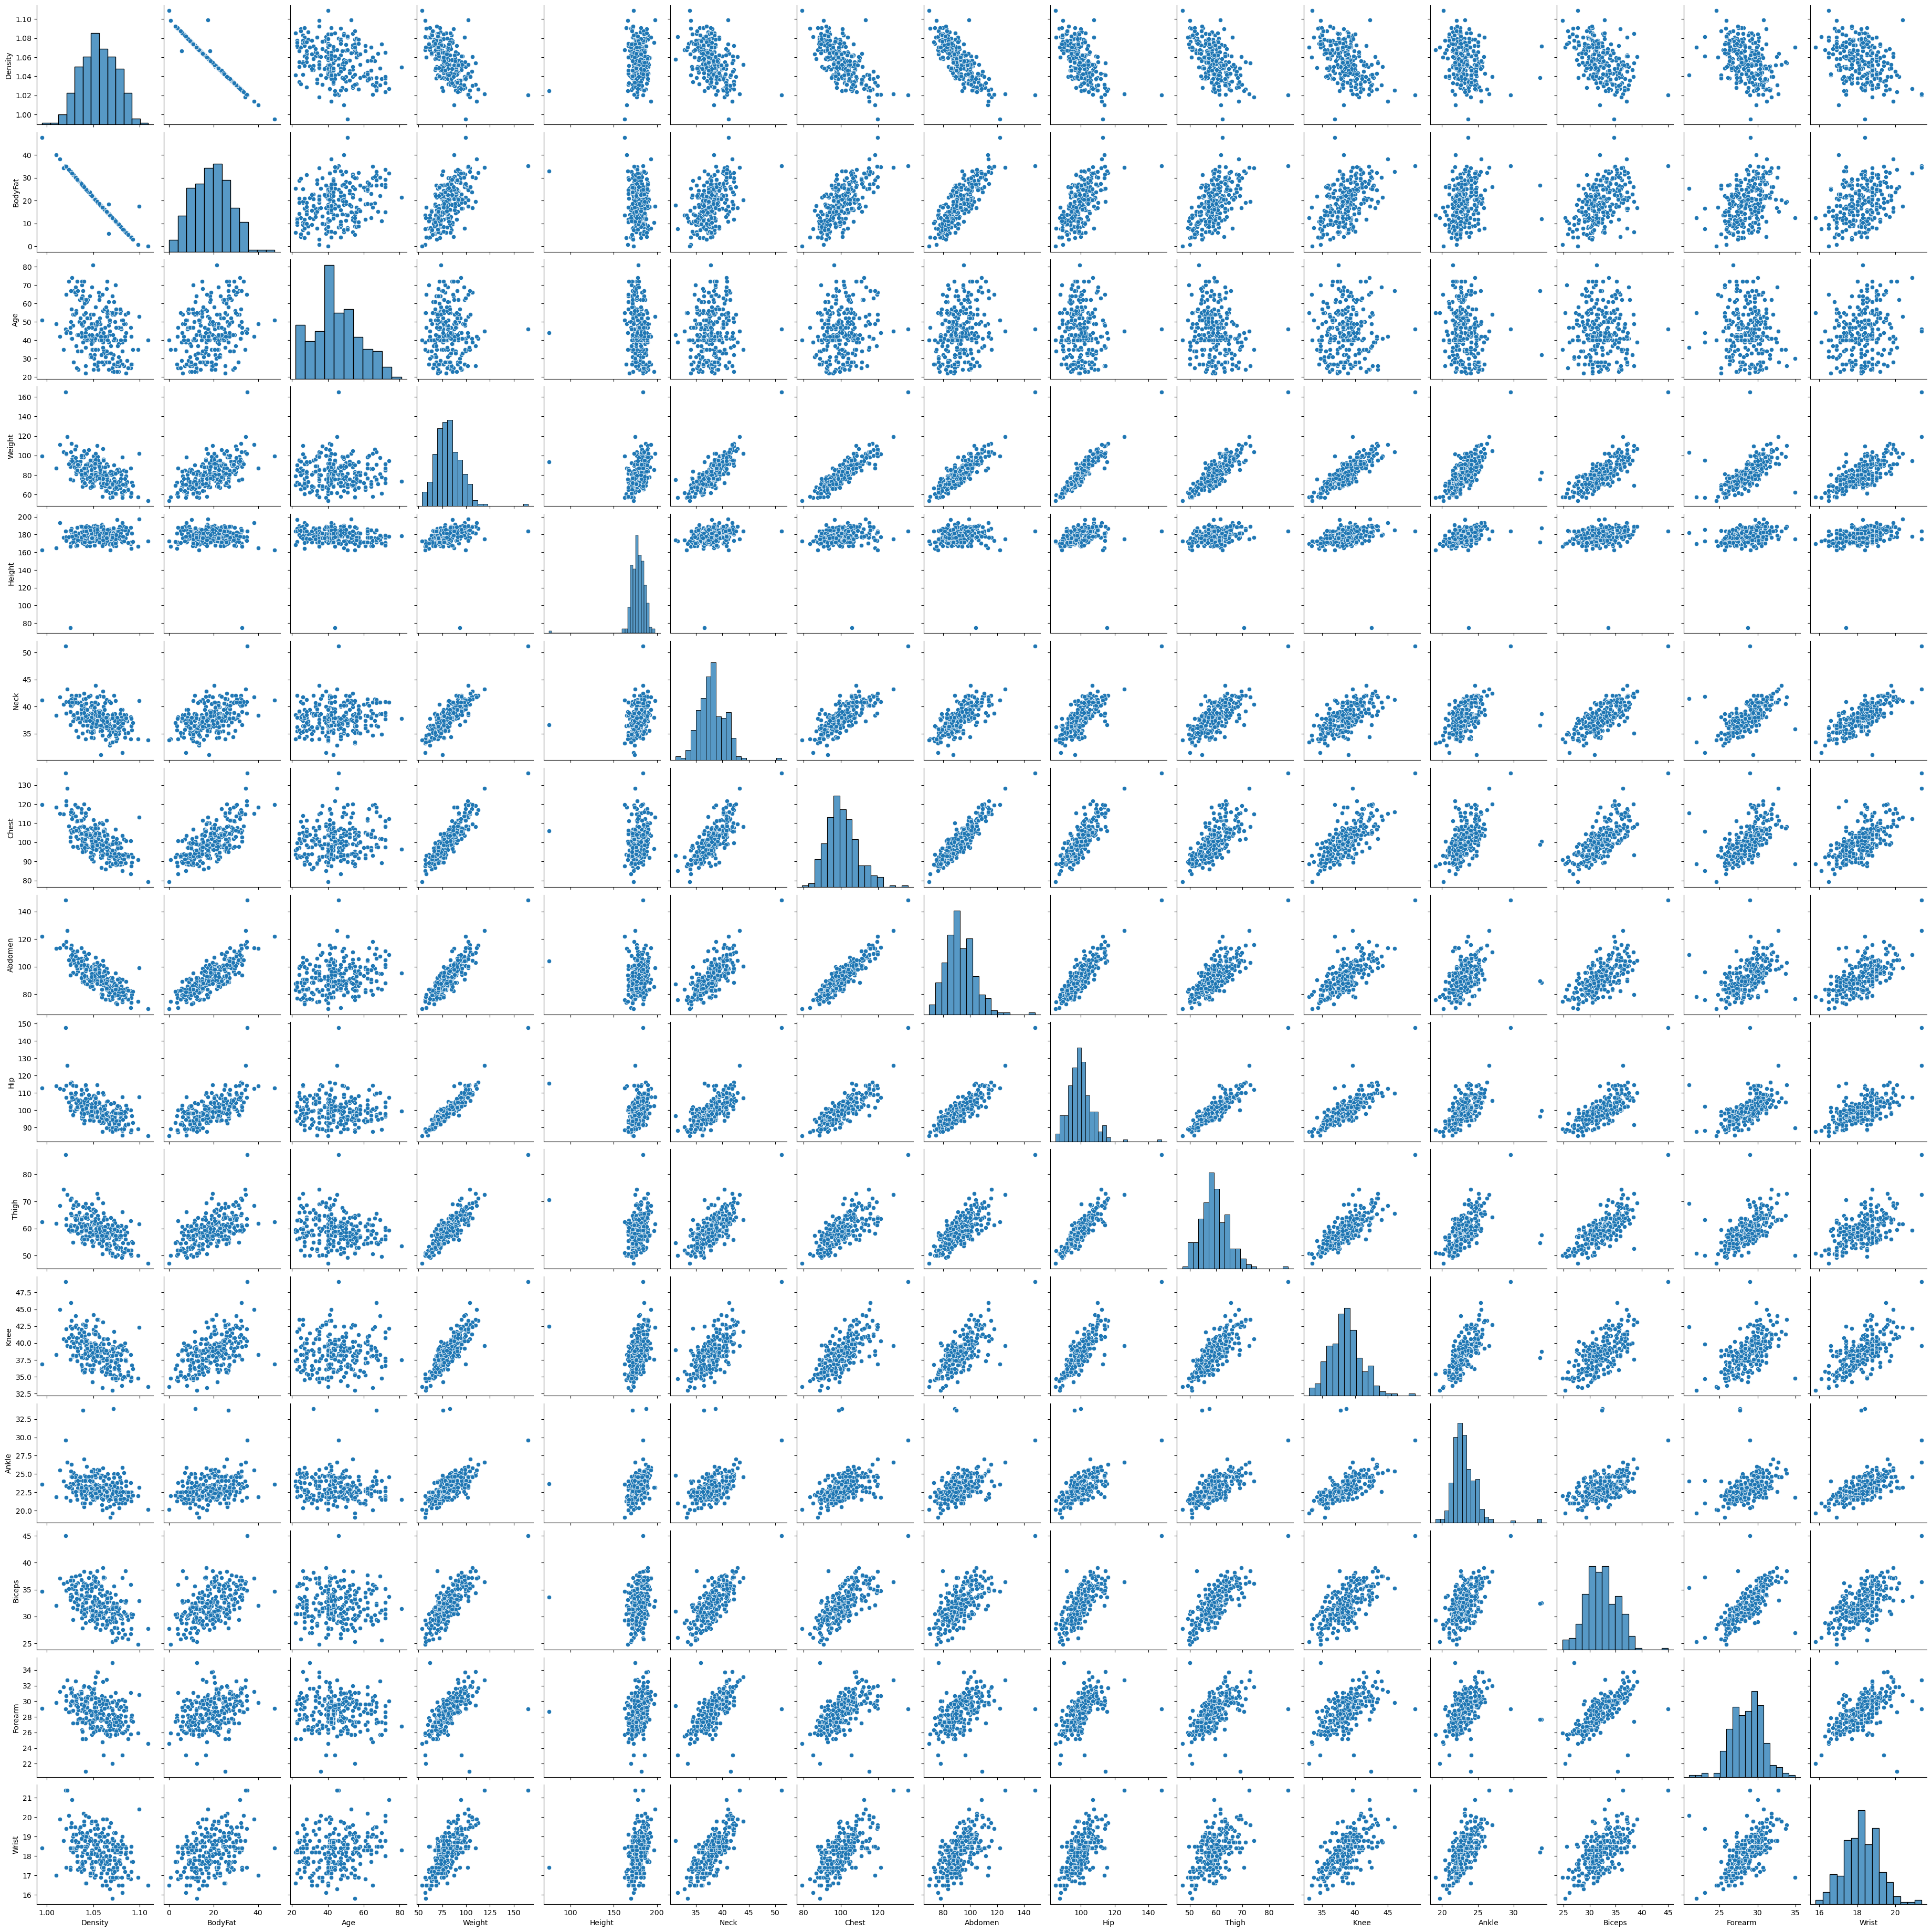

In [13]:
sns.pairplot(df)

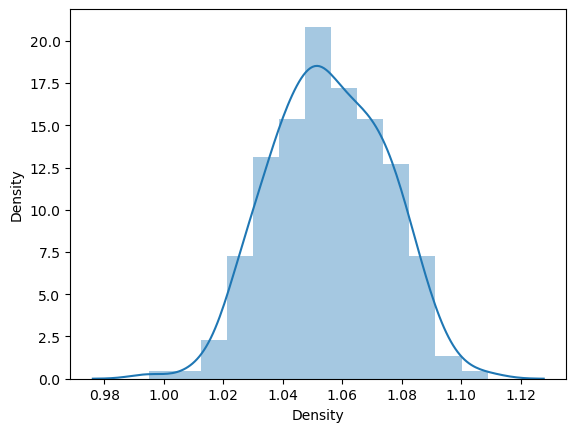

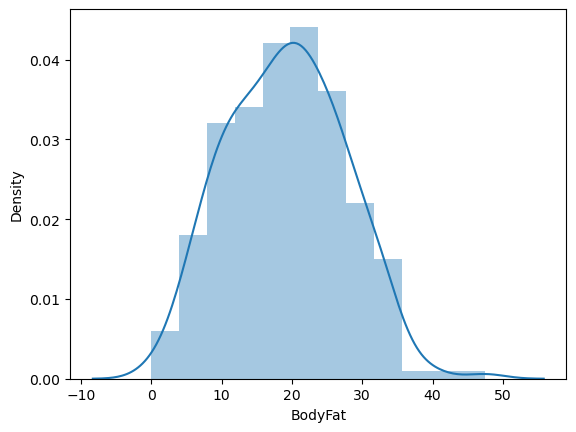

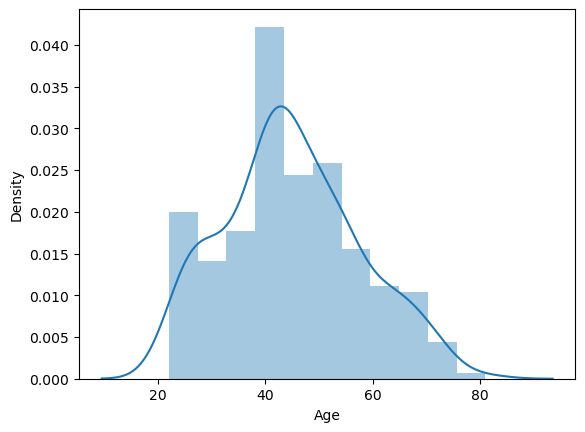

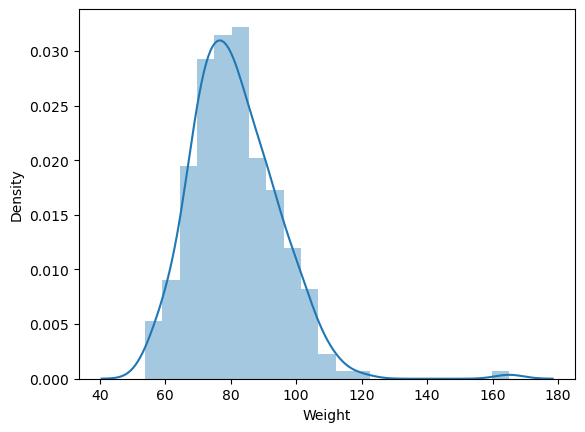

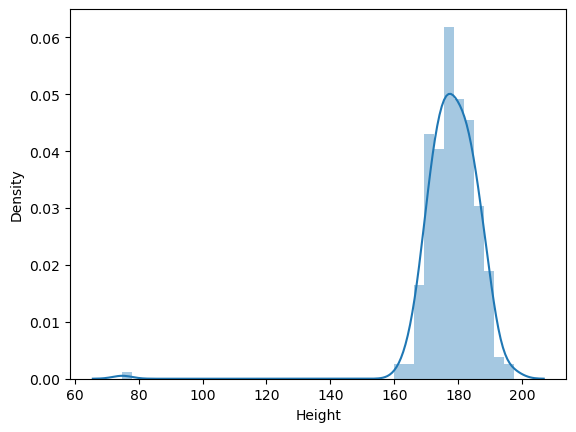

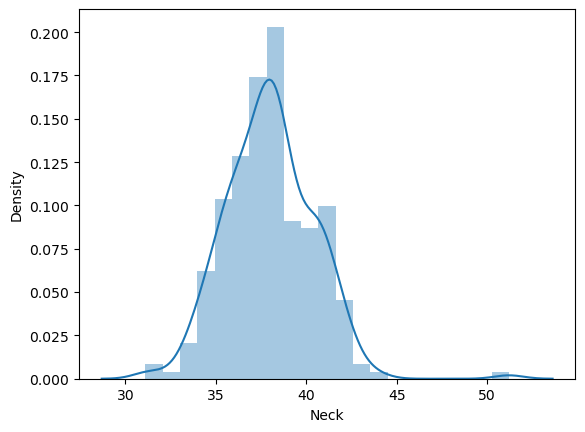

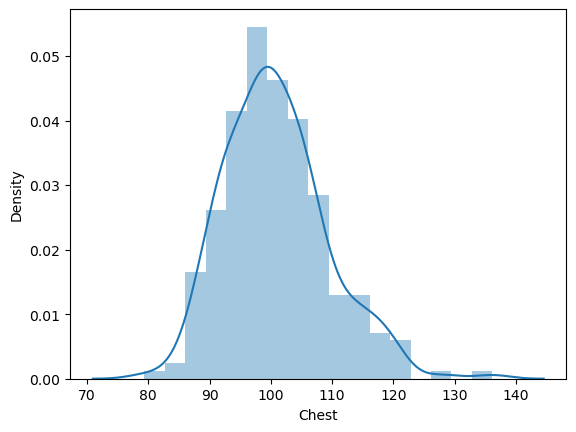

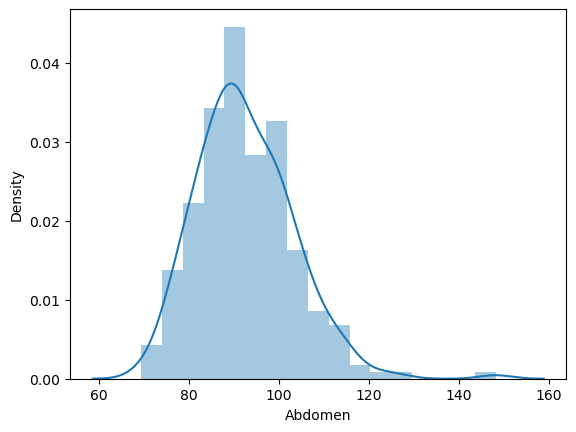

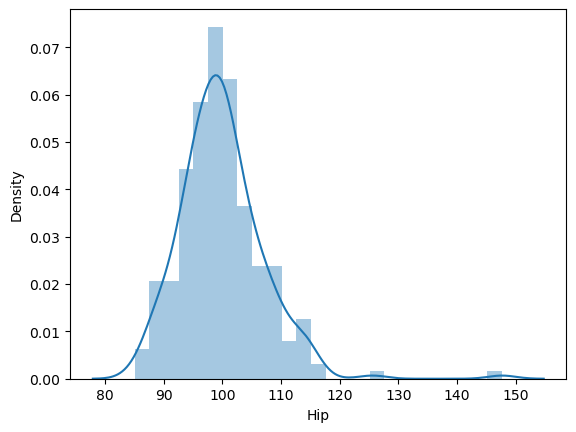

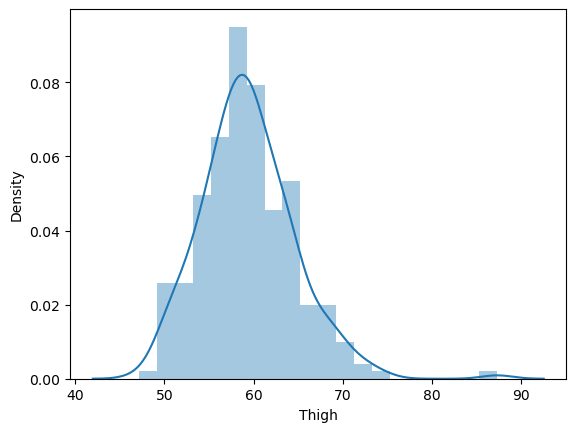

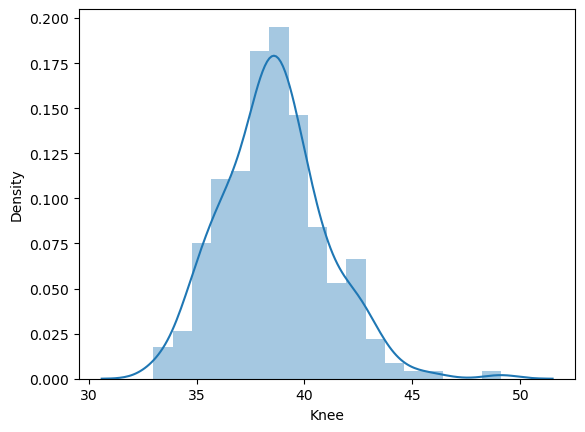

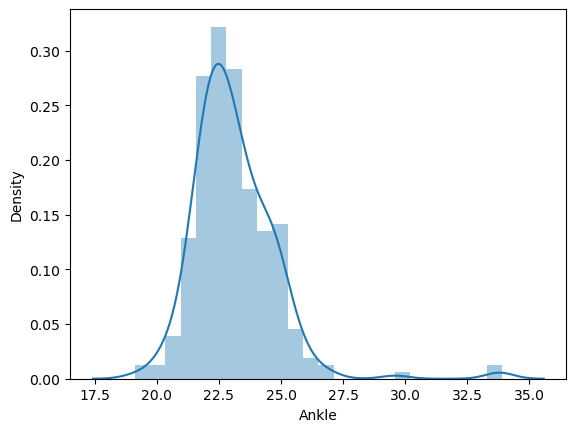

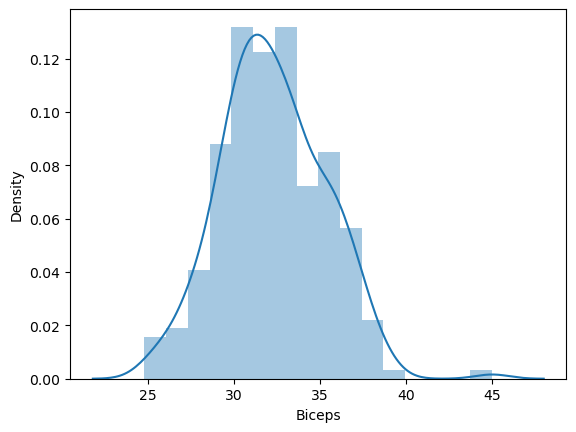

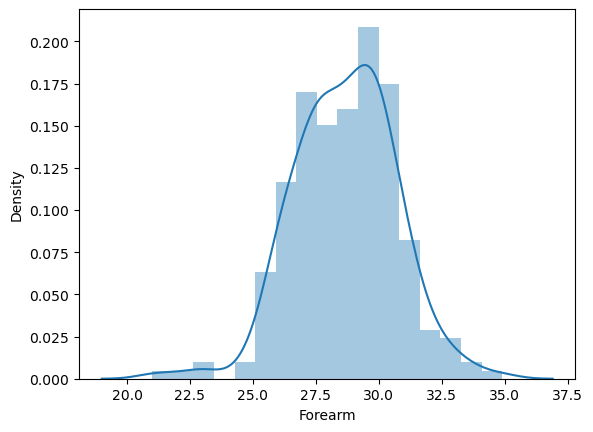

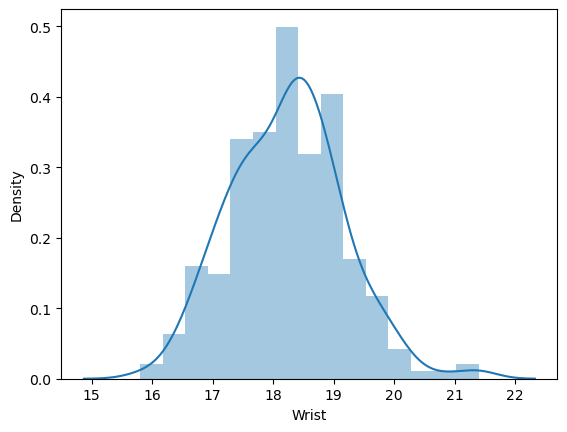

In [14]:
for column in df.columns:
    sns.distplot(df[column])
    plt.show()

In [58]:
def bodyfatvsothers(col):
    plt.figure(figsize=(12,5))
    sns.distplot(df['BodyFat'],color='red',hist= False ,label='BodyFat')
    sns.distplot(df[col],color='green',hist= False ,label=col)
    plt.legend()
    plt.show()

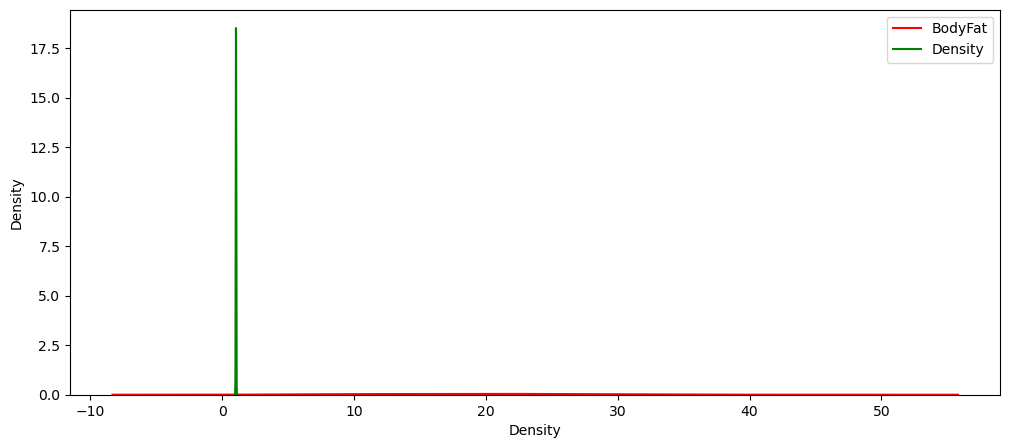

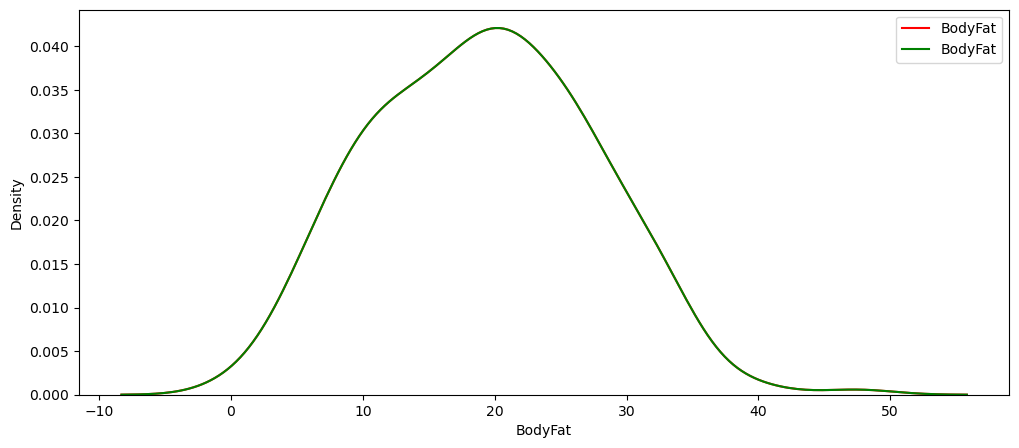

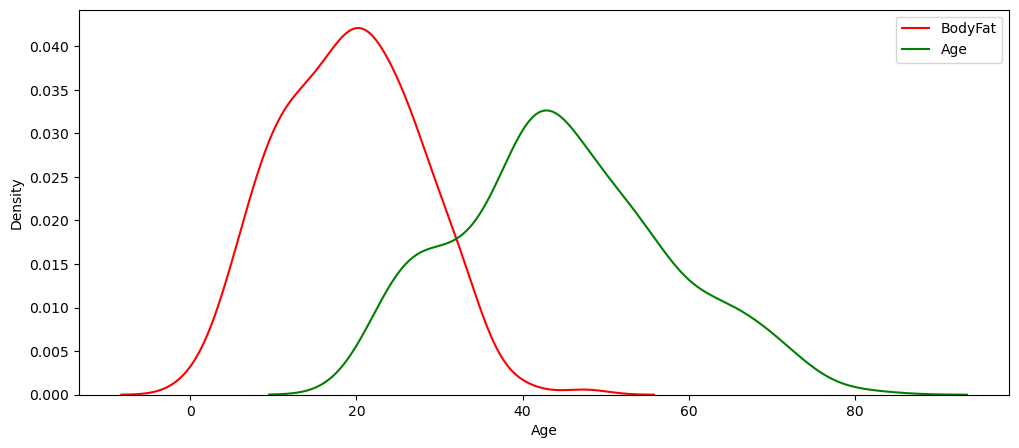

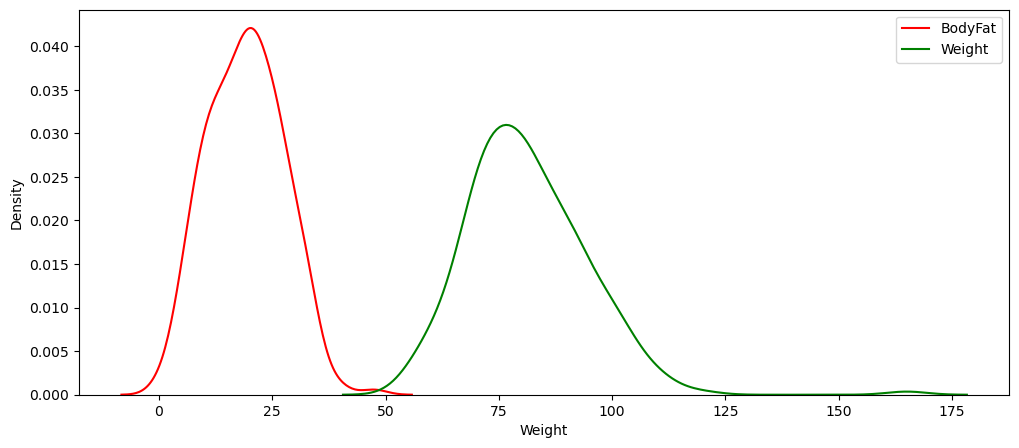

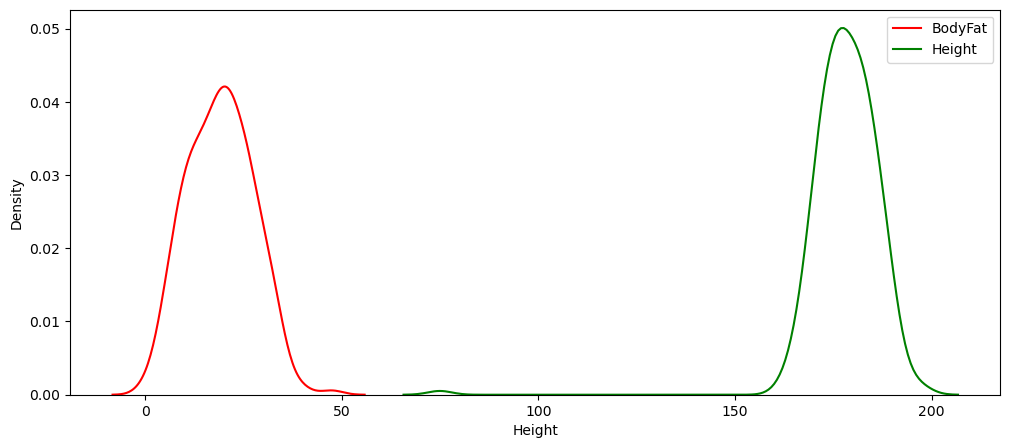

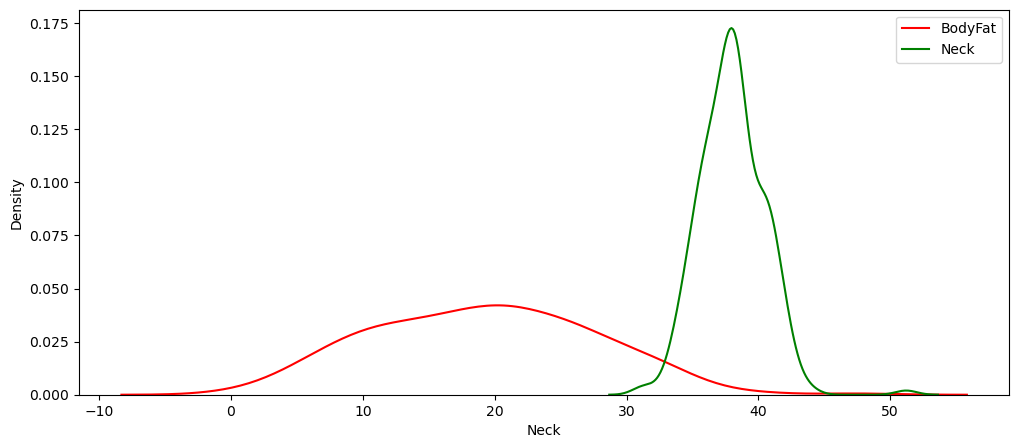

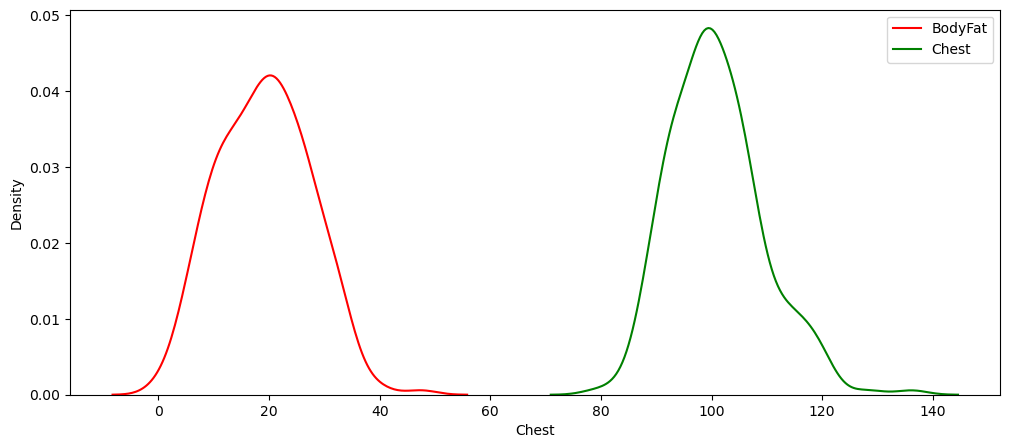

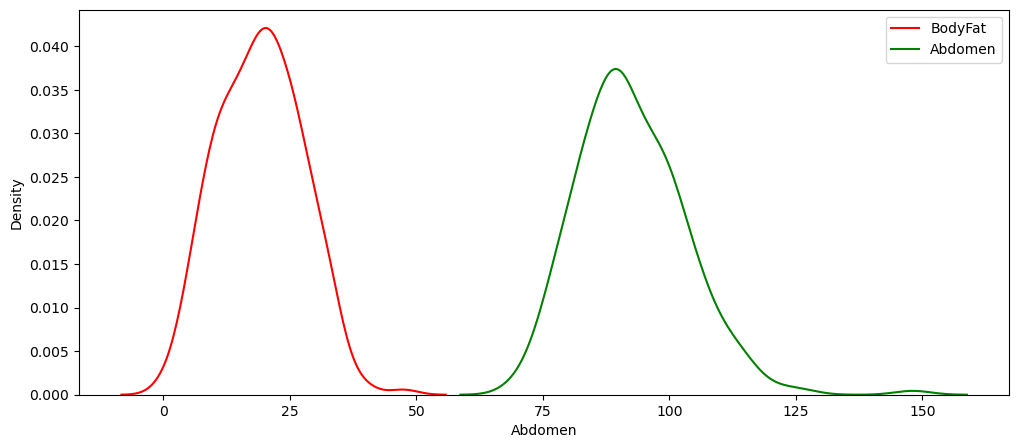

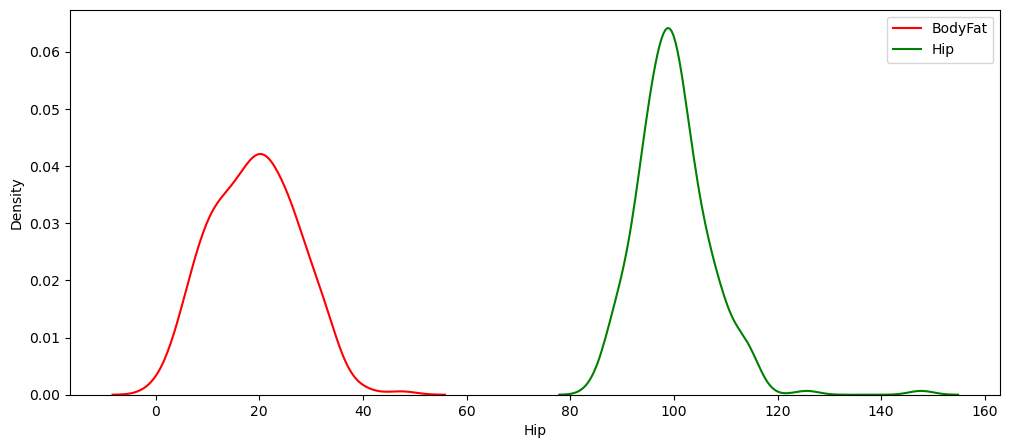

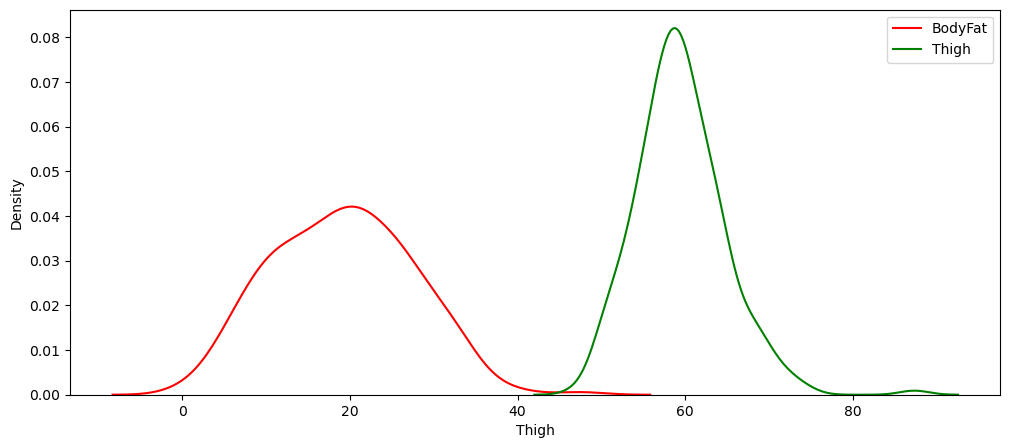

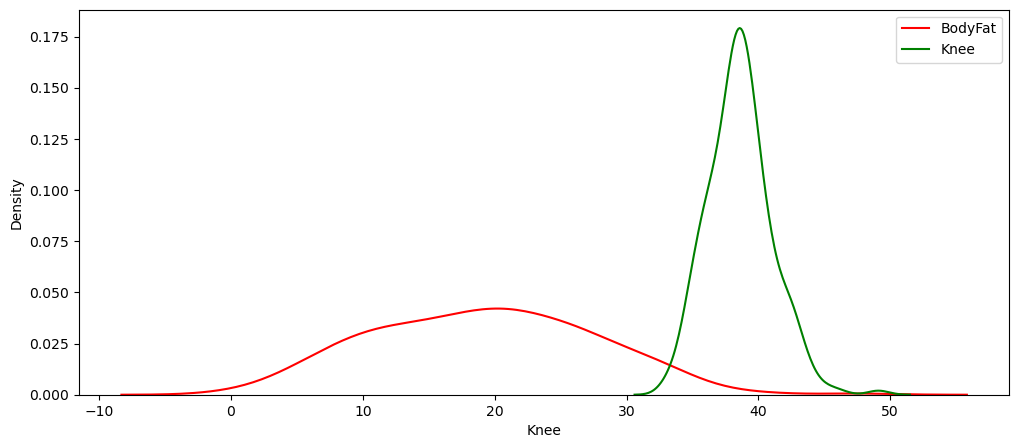

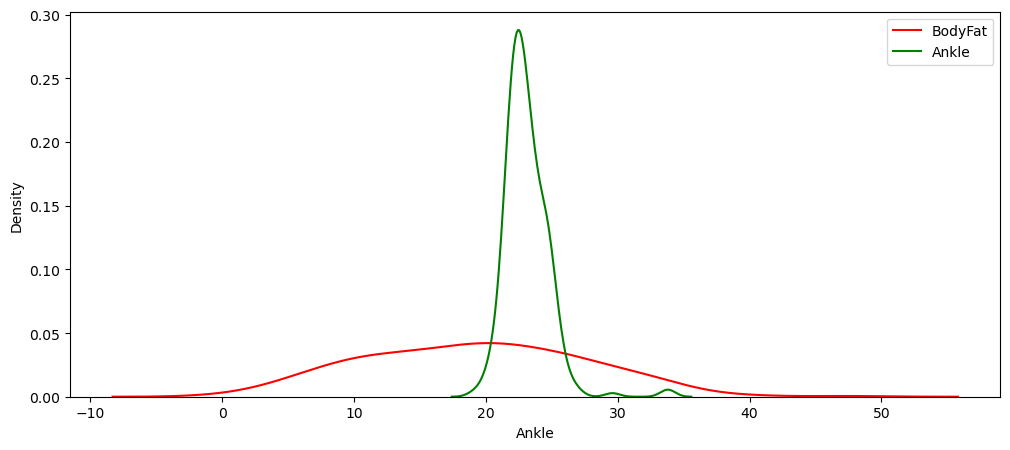

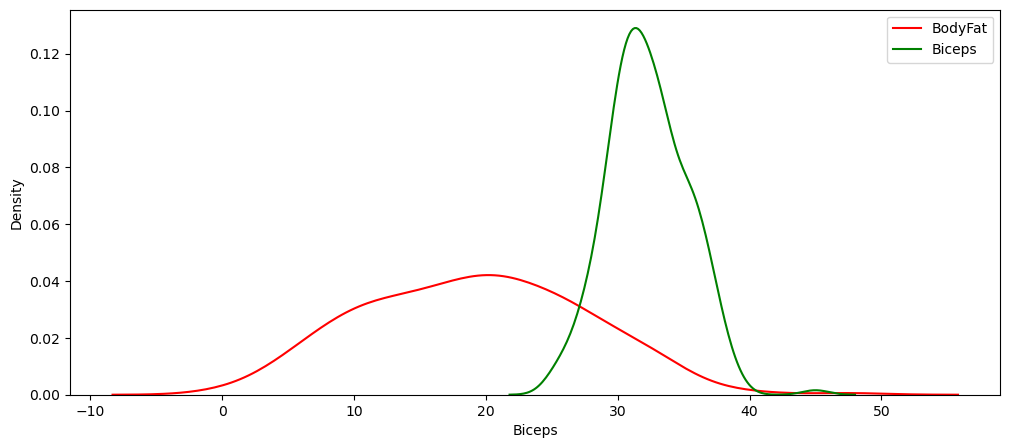

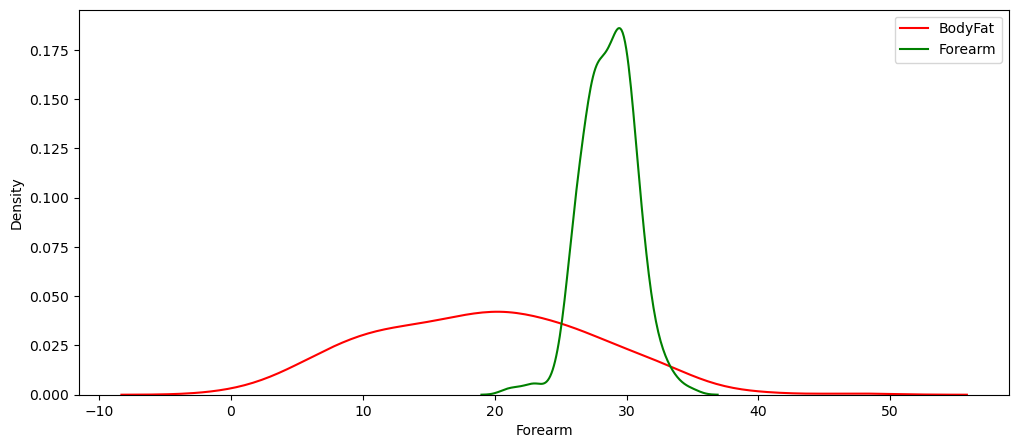

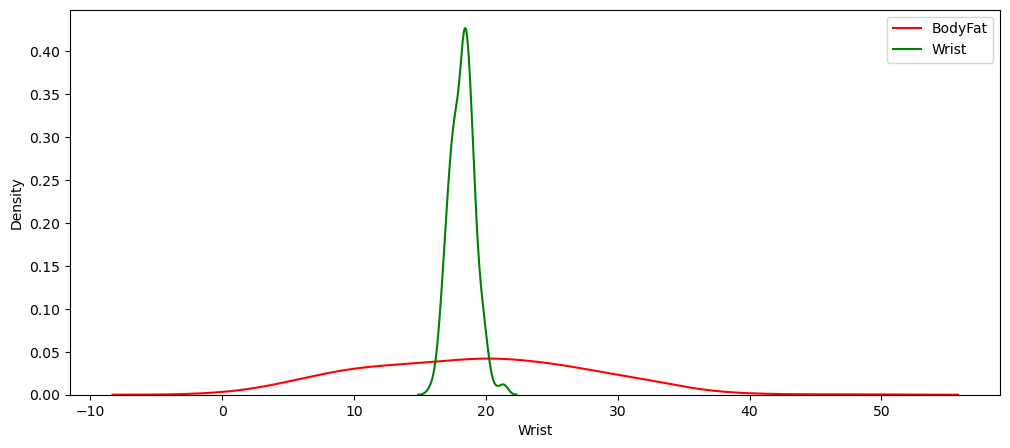

In [59]:
cols=list(df.columns)

for i in cols:
    bodyfatvsothers(i)

- Above we can see that Age,Chest,Abdomen,Hip and Thigh have gaussian distributions and we can say that these features have relations with the Body Fat. We will do the feature selection later but above visuals are giving us some information how our feature selection needs to be.

========================================================================================================================

- We will do the distribution analysis below and see the distributions (right skewed,left skewed or symmetric). We will also be able see the outliers and probability plots(Gaussian distributions of the variables).

In [62]:
def plots (df,col):
    
    plt.figure(figsize=(15,7))
    plt.subplot (1,3,1)
    plt.hist(df[col],color='magenta')
    
    plt.subplot (1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot (1,3,3)
    sns.boxplot(df[col],color='magenta')
    
    plt.show()

Distribution plots for the feature Density are shown below


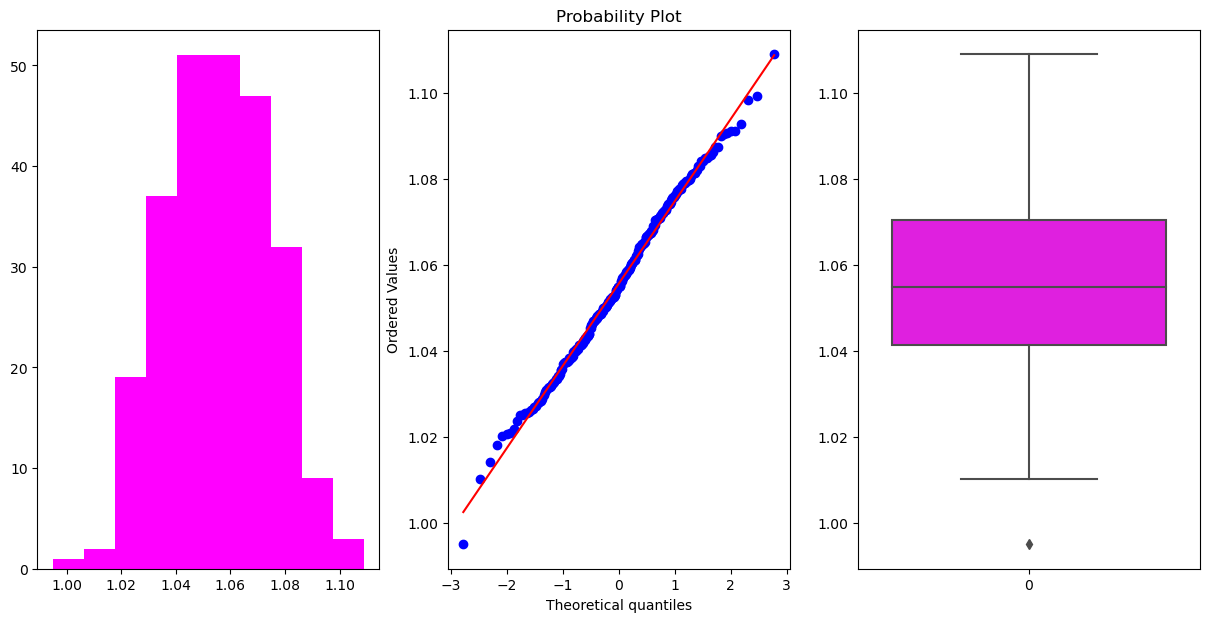

Distribution plots for the feature BodyFat are shown below


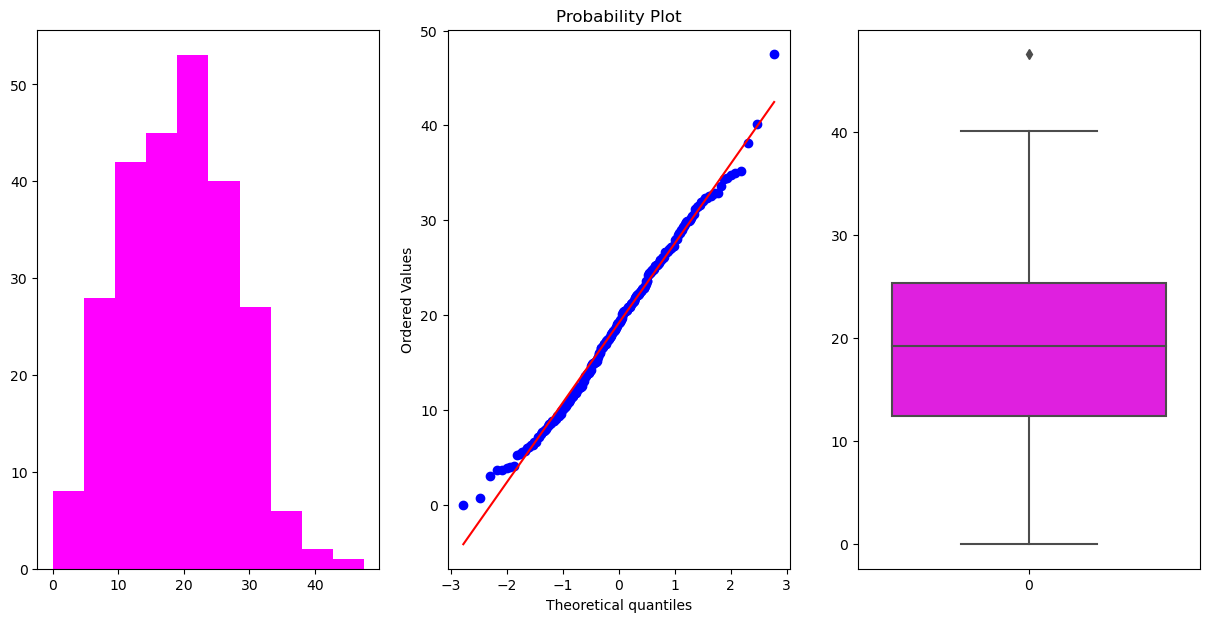

Distribution plots for the feature Age are shown below


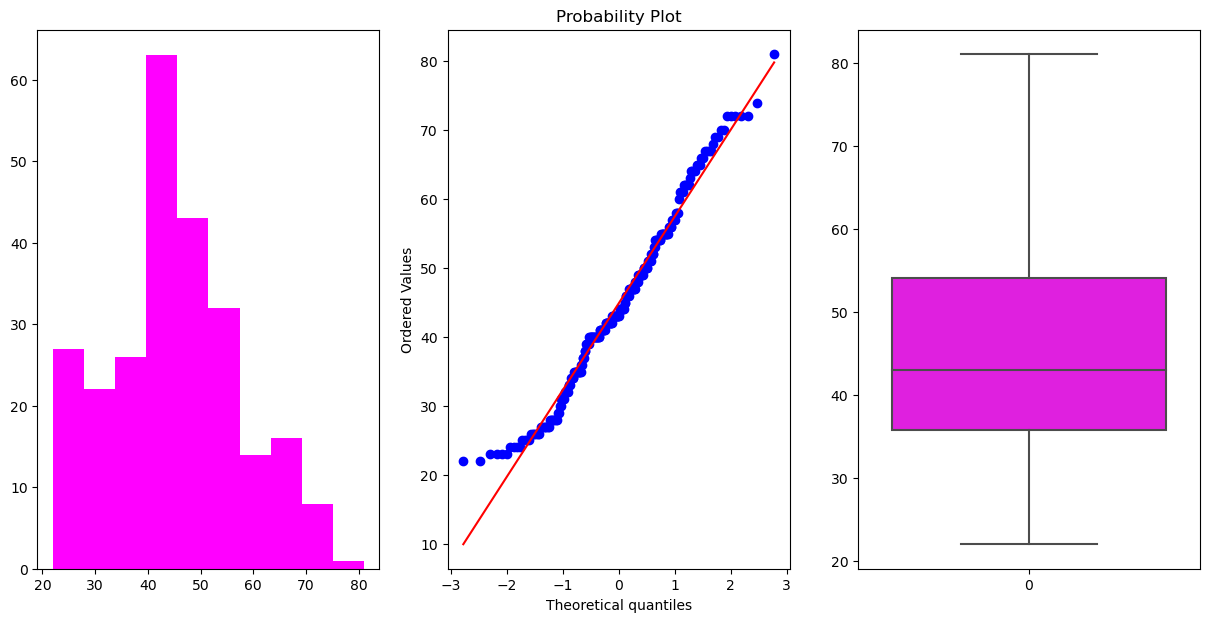

Distribution plots for the feature Weight are shown below


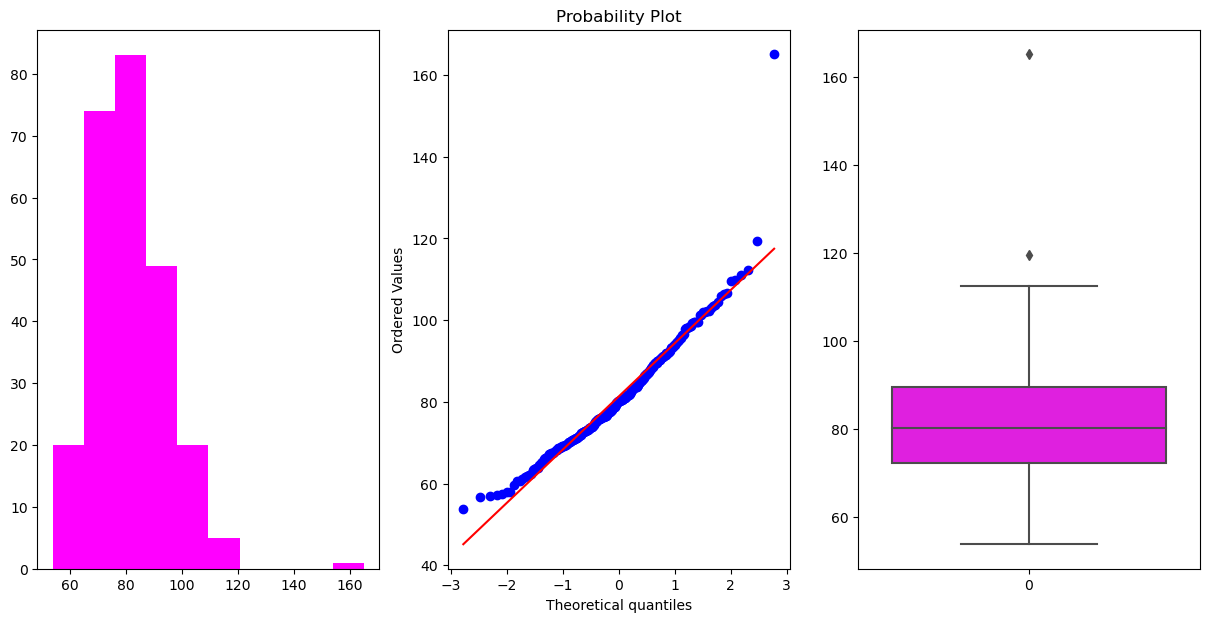

Distribution plots for the feature Height are shown below


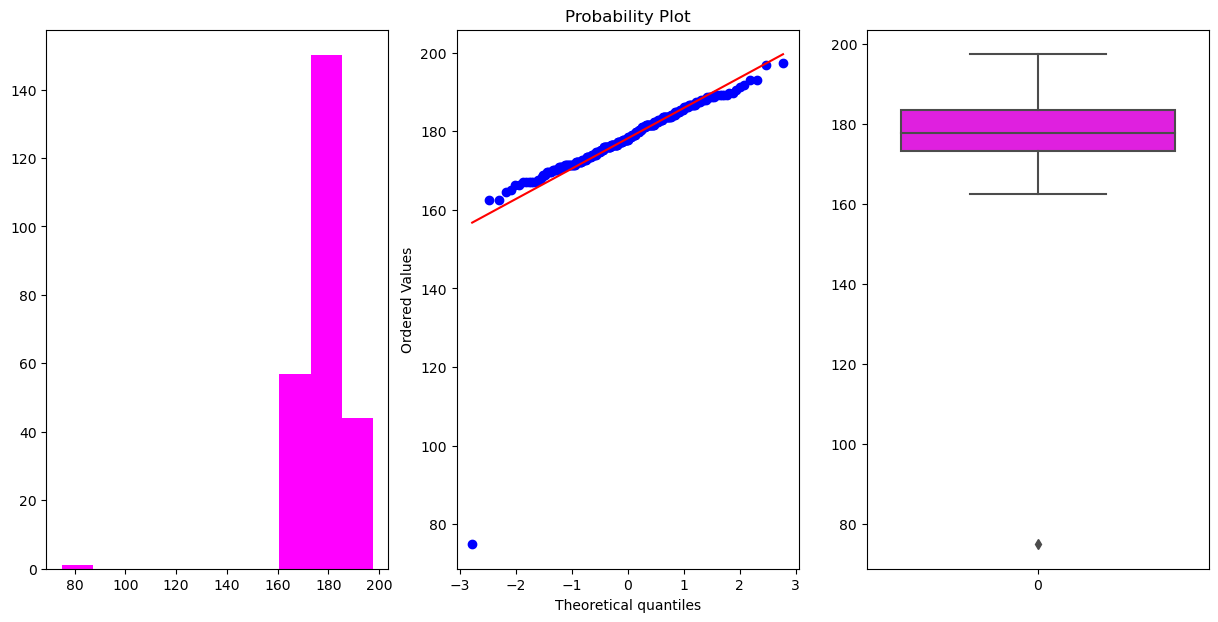

Distribution plots for the feature Neck are shown below


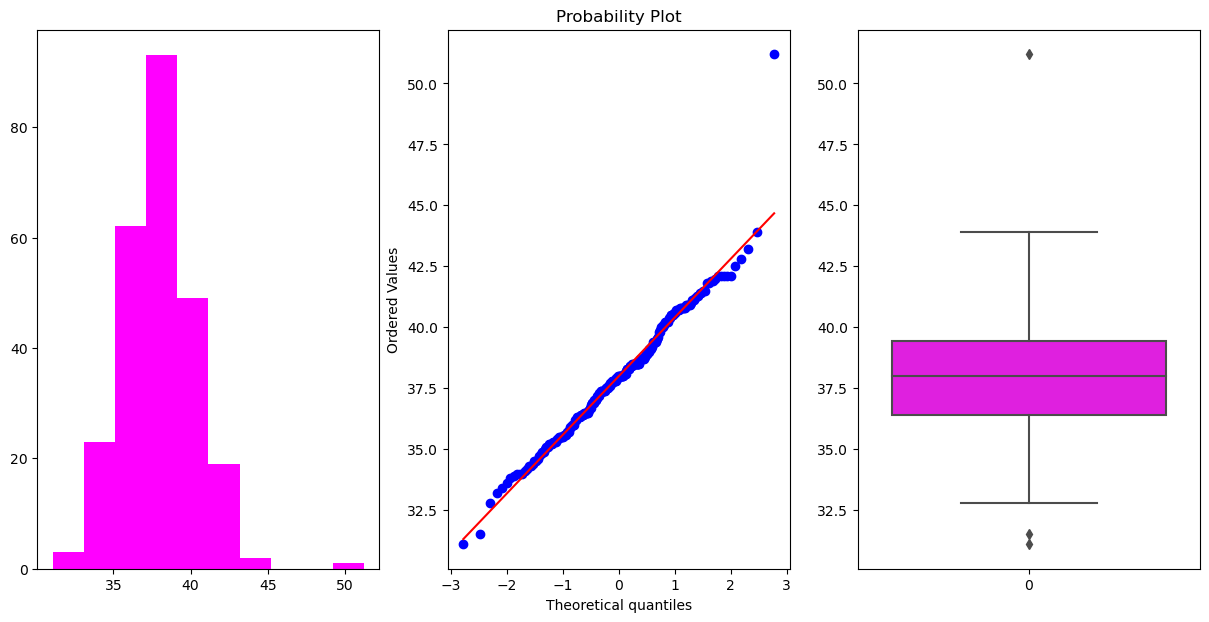

Distribution plots for the feature Chest are shown below


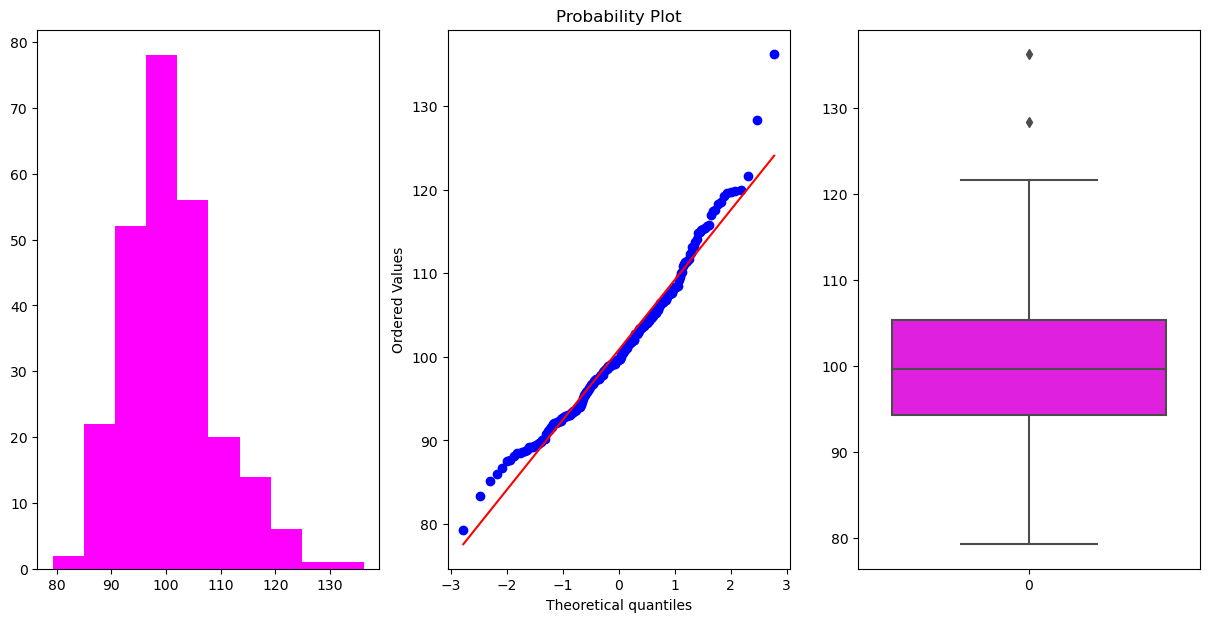

Distribution plots for the feature Abdomen are shown below


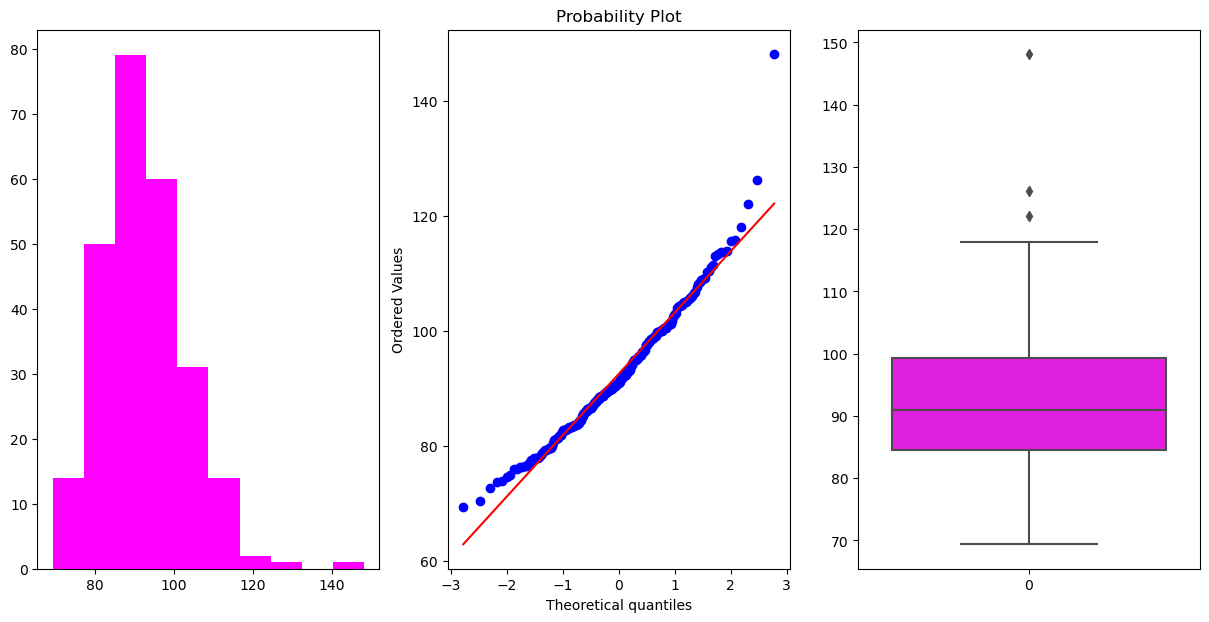

Distribution plots for the feature Hip are shown below


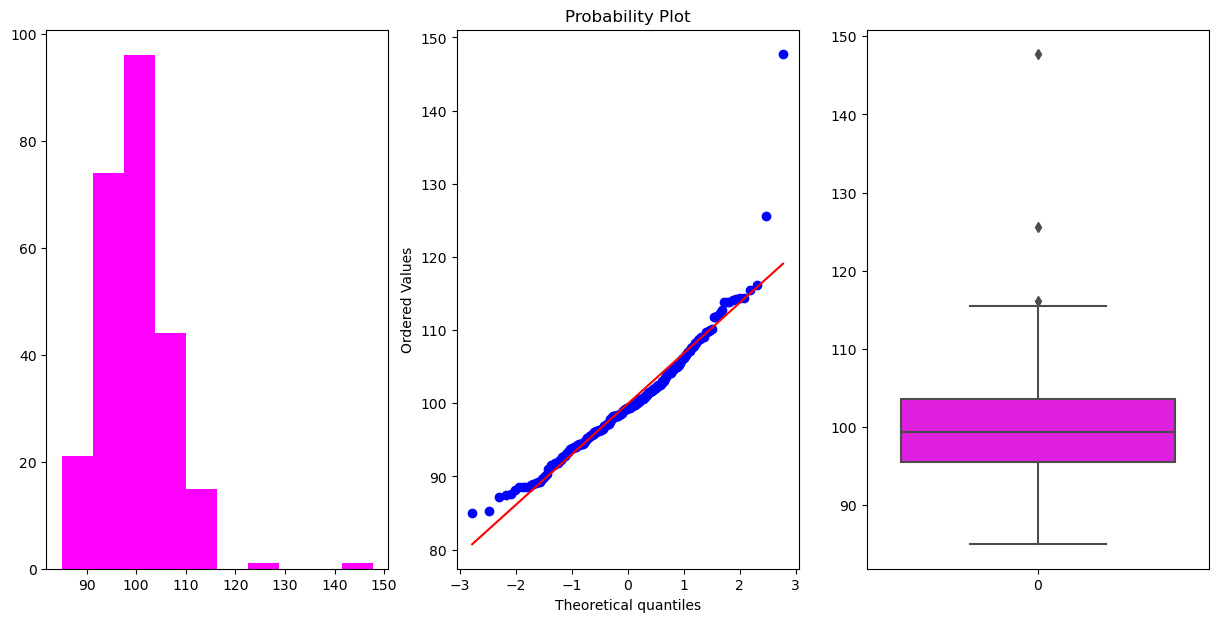

Distribution plots for the feature Thigh are shown below


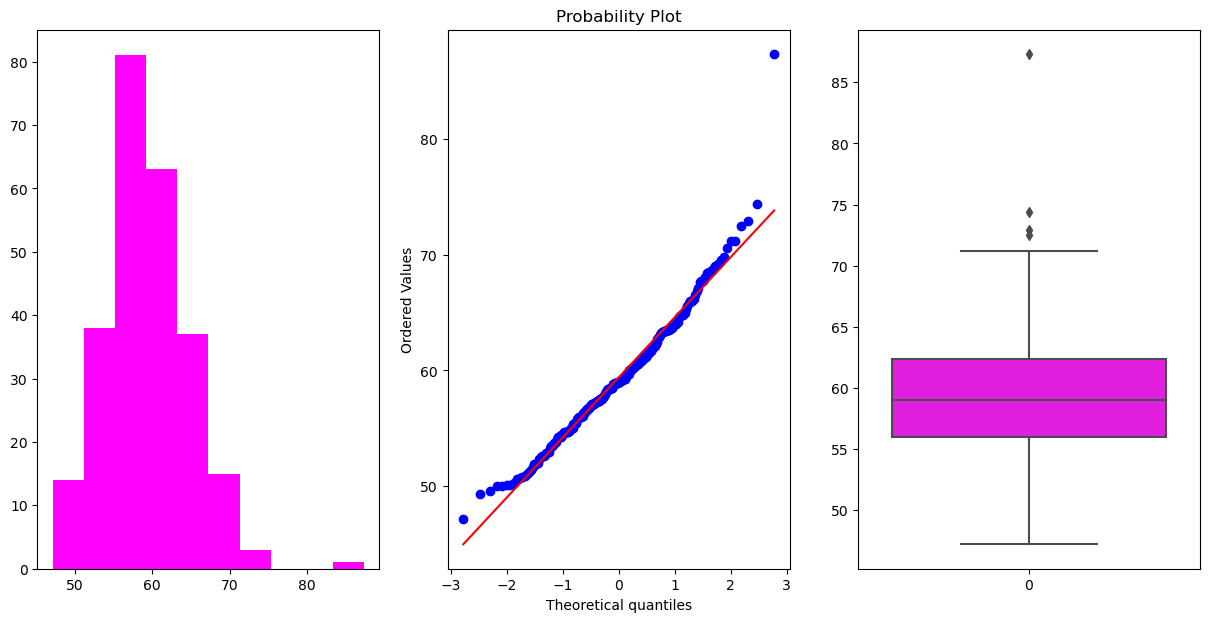

Distribution plots for the feature Knee are shown below


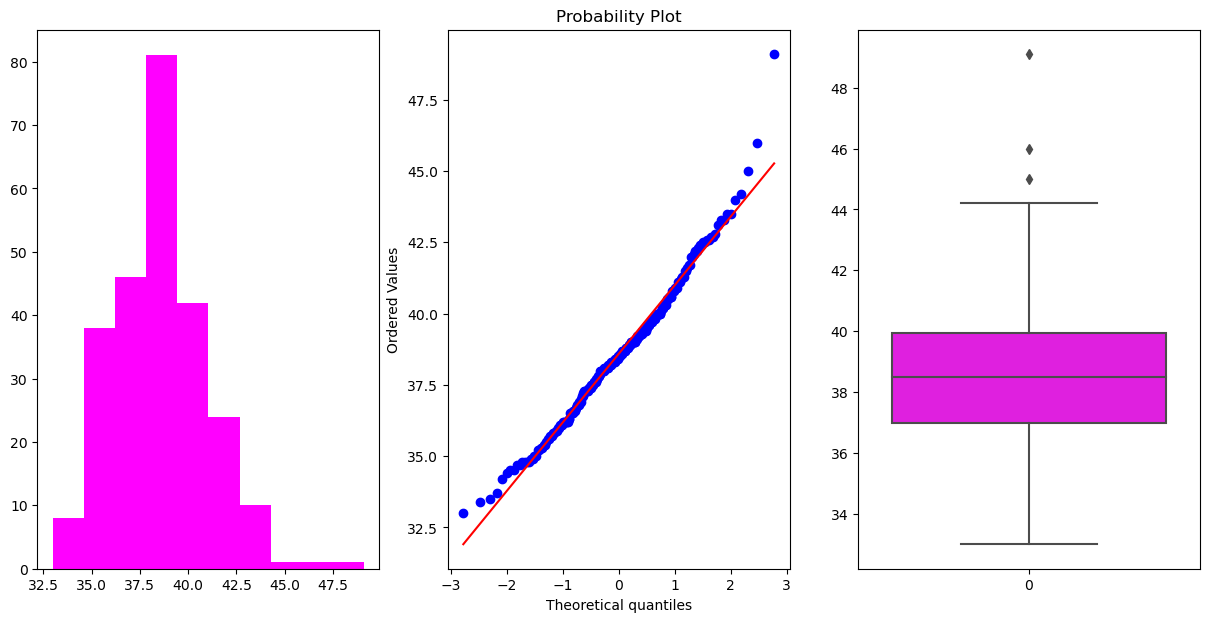

Distribution plots for the feature Ankle are shown below


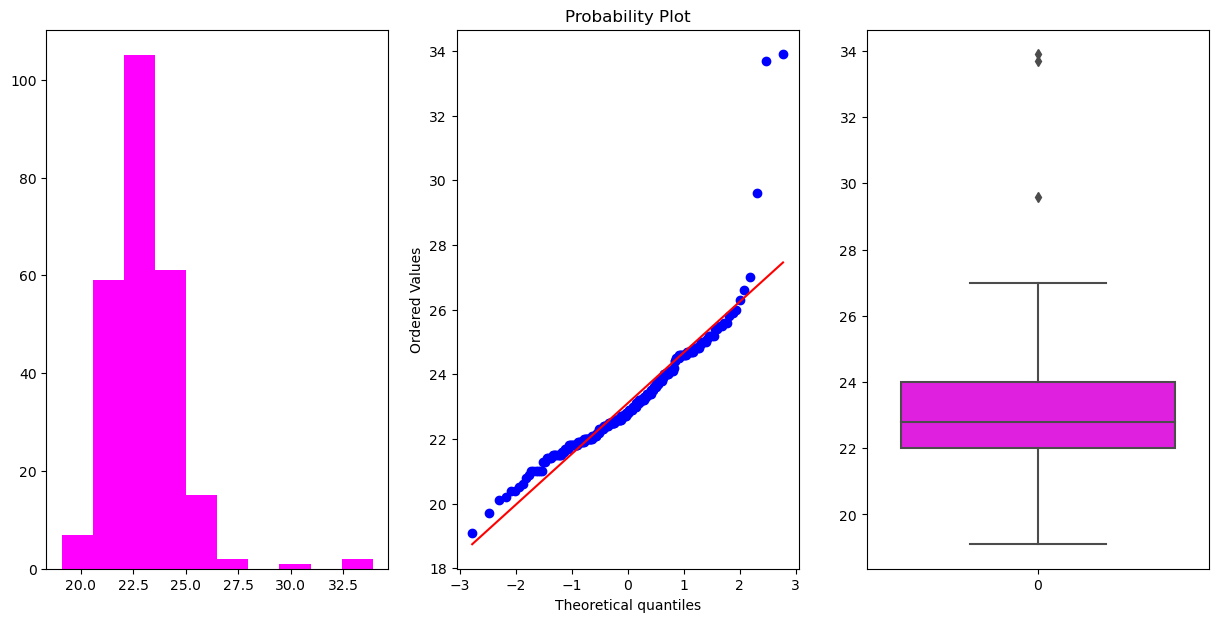

Distribution plots for the feature Biceps are shown below


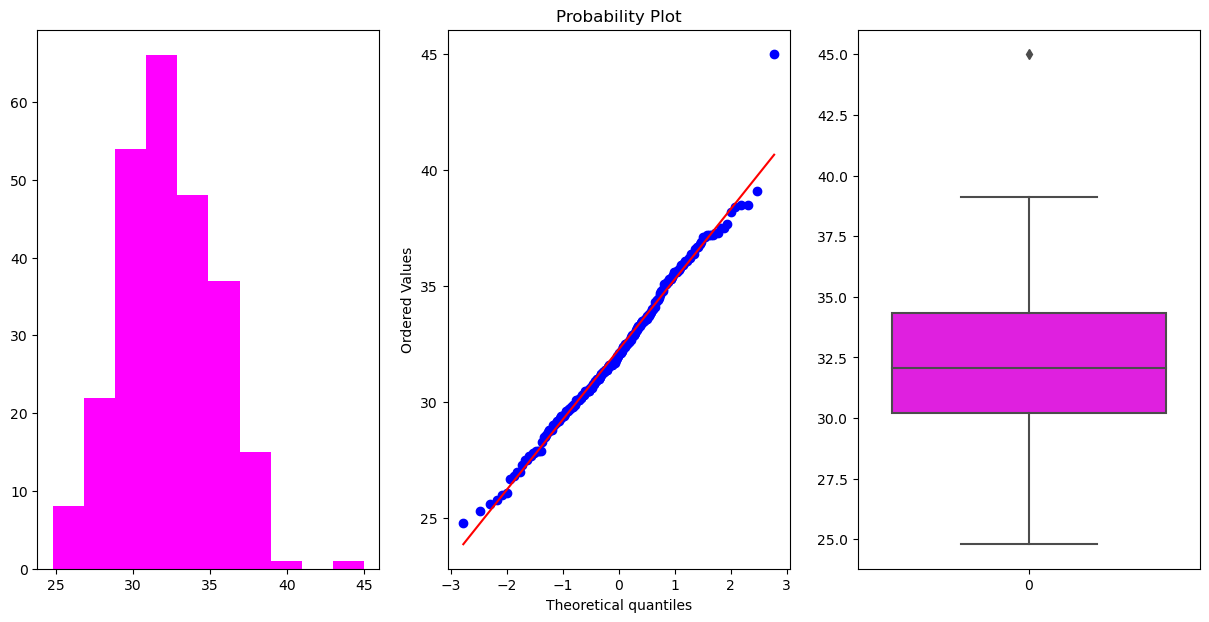

Distribution plots for the feature Forearm are shown below


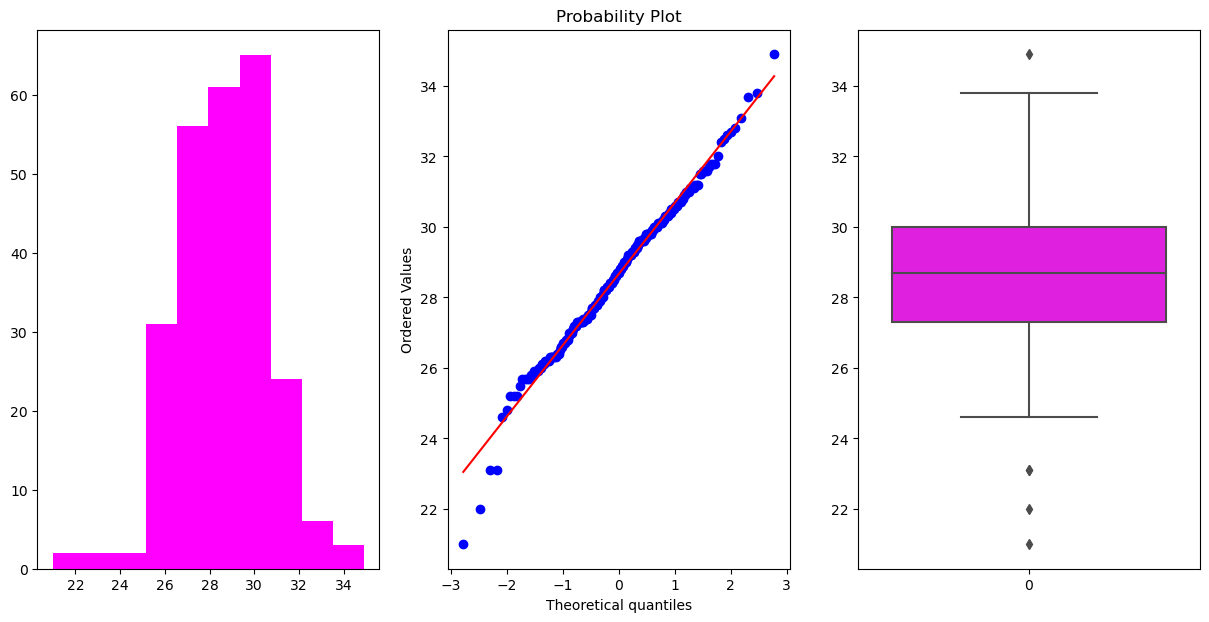

Distribution plots for the feature Wrist are shown below


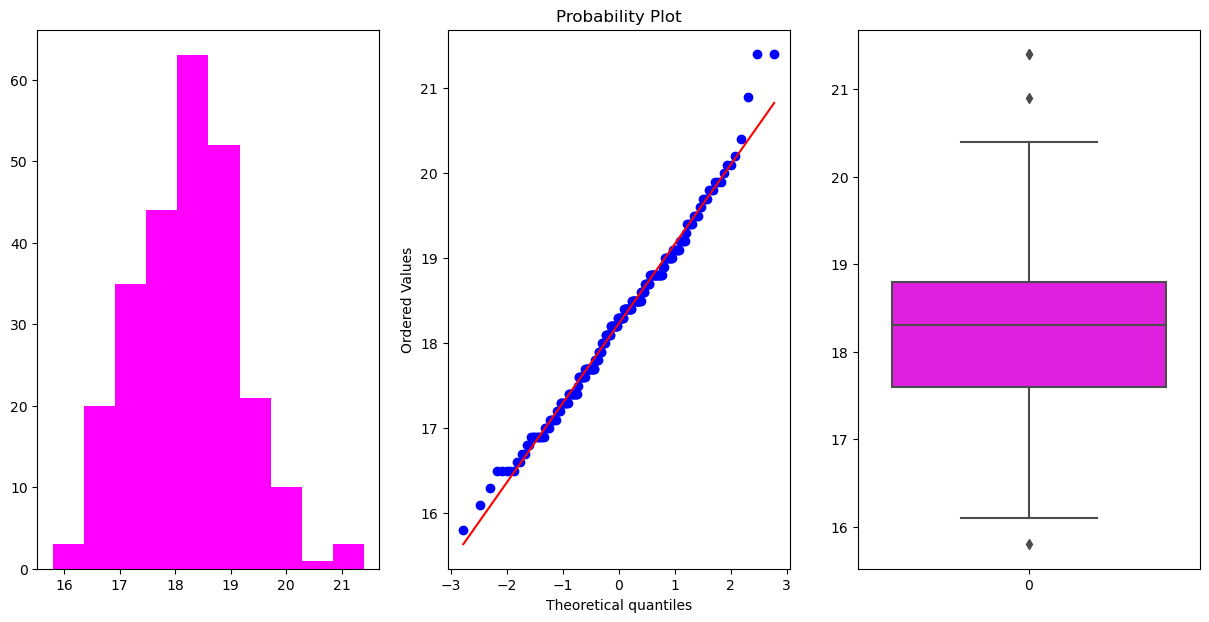

In [63]:
cols=list(df.columns)
for i in range (len(cols)):
    
    print(f'Distribution plots for the feature {cols[i]} are shown below')
    
    plots(df,cols[i])

- Above we can see that all the features are gaussian distributed and it means that we don't need to do preprocessing and looks like we will get good results in the modelling part. We have some outliers but i want to keep them instead of removing as these outliers make sense to me. In the modelling part of the project i can choose ML models that are not sensitive to outliers.(Like Decision Tree Regressor,Random Forest Regressor etc.)

#### Feature Selection

Above we saw that Age,Chest,Abdomen,Hip and Thigh have gaussian distributions and we said that these features have relations with the Body Fat. Below we will use some predefined algorithms to do feature selection and let's see if Age,Chest,Abdomen,Hip and Thigh are in the list.

#### Extra Trees Regressor

In [20]:
data=df.copy()
test=data['BodyFat']
train=data.drop(['BodyFat'],axis=1)

In [21]:
er=ExtraTreesRegressor()
er.fit(train,test)

ExtraTreesRegressor()

<Axes: >

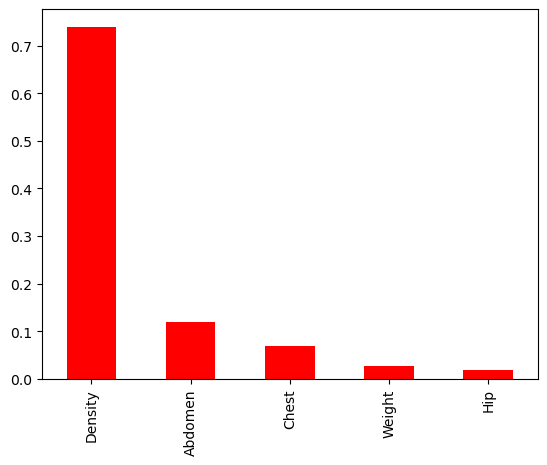

In [67]:
plotdata1=pd.Series(er.feature_importances_,index=train.columns)
plotdata1.nlargest(5).plot(kind='bar',color='red')

#### Mutual information gain for feature selection

In [23]:
from sklearn.feature_selection import mutual_info_regression

In [24]:
mr=mutual_info_regression(train,test)

<Axes: >

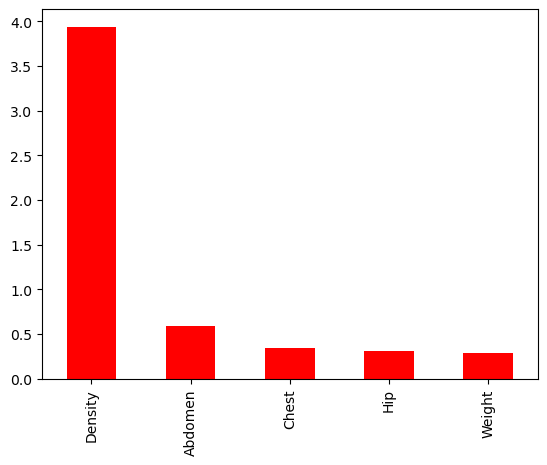

In [68]:
plotdata2 = pd.Series(mr,index=train.columns)
plotdata2.nlargest(5).plot(kind='bar',color='red')

#### Heat Map

Now we will create a heatmap — the correlation matrix heatmap. A correlation matrix allows us to identify how well, or not so well, features within a dataset correlate with each other.

<Axes: >

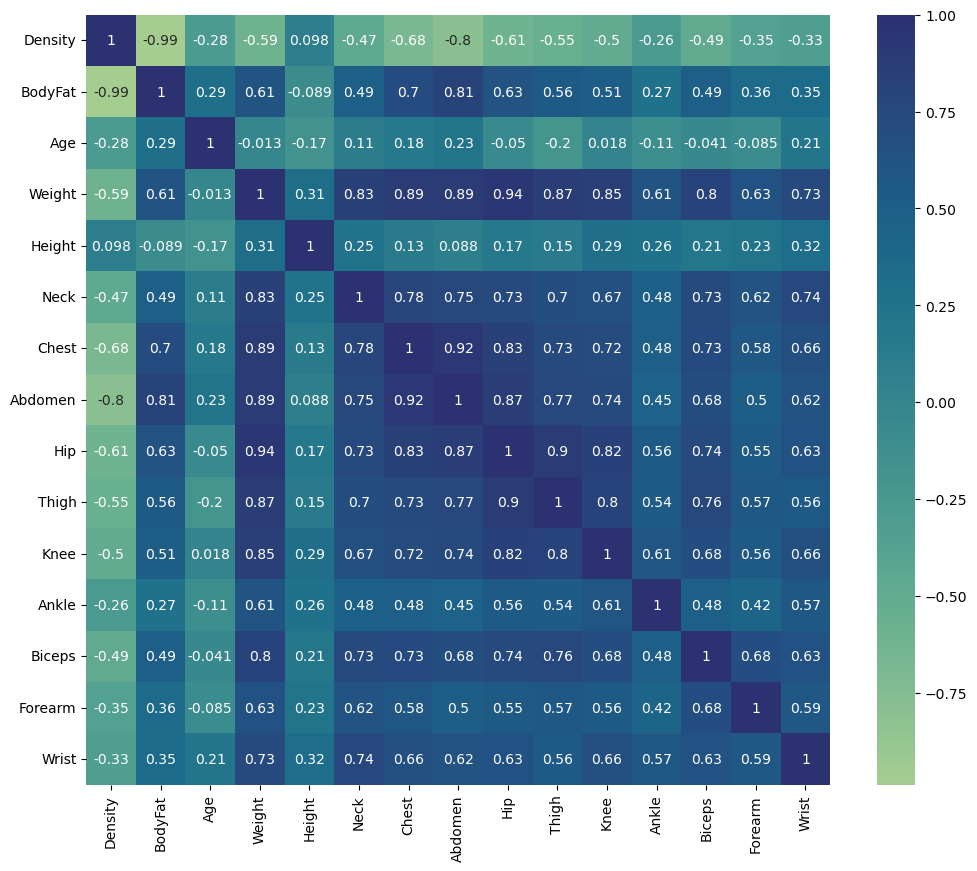

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='crest')

We have some higly correlated features.

In [27]:
df.corr()

Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097876 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612417 -0.089497  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012737 -0.171658  0.113505  0.176450   
Weight  -0.594062  0.612417 -0.012737  1.000000  0.308296  0.830700  0.894195   
Height   0.097876 -0.089497 -0.171658  0.308296  1.000000  0.253687  0.134881   
Neck    -0.472966  0.490592  0.113505  0.830700  0.253687  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894195  0.134881  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887997  0.087821  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940887  0.170405  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868686  0.148435  0.695697  0.729859   
Knee    -0.495040  0.508665  0.017516  0.853164  0.286065  0.672405  0.719496   
Ankle   -0.264890  0.265970 -0.105058  0.613684  0.264738  0.477892  0.482988   
Biceps  -0.487109  0.493271 -0.041162  0.800410  0.207799  0.731146  0.727907   
Forearm -0.351648  0.361387 -0.085056  0.630293  0.228623  0.623660  0.580173   
Wrist   -0.325716  0.346575  0.213531  0.729764  0.322060  0.744826  0.660162   

          Abdomen       Hip     Thigh      Knee     Ankle    Biceps   Forearm  \
Density -0.798955 -0.609331 -0.553091 -0.495040 -0.264890 -0.487109 -0.351648   
BodyFat  0.813432  0.625201  0.559608  0.508665  0.265970  0.493271  0.361387   
Age      0.230409 -0.050332 -0.200096  0.017516 -0.105058 -0.041162 -0.085056   
Weight   0.887997  0.940887  0.868686  0.853164  0.613684  0.800410  0.630293   
Height   0.087821  0.170405  0.148435  0.286065  0.264738  0.207799  0.228623   
Neck     0.754077  0.734958  0.695697  0.672405  0.477892  0.731146  0.623660   
Chest    0.915828  0.829420  0.729859  0.719496  0.482988  0.727907  0.580173   
Abdomen  1.000000  0.874066  0.766624  0.737179  0.453223  0.684983  0.503316   
Hip      0.874066  1.000000  0.896410  0.823473  0.558387  0.739273  0.545014   
Thigh    0.766624  0.896410  1.000000  0.799170  0.539797  0.761477  0.566842   
Knee     0.737179  0.823473  0.799170  1.000000  0.611608  0.678709  0.555898   
Ankle    0.453223  0.558387  0.539797  0.611608  1.000000  0.484855  0.419050   
Biceps   0.684983  0.739273  0.761477  0.678709  0.484855  1.000000  0.678255   
Forearm  0.503316  0.545014  0.566842  0.555898  0.419050  0.678255  1.000000   
Wrist    0.619832  0.630090  0.558685  0.664507  0.566195  0.632126  0.585588   

            Wrist  
Density -0.325716  
BodyFat  0.346575  
Age      0.213531  
Weight   0.729764  
Height   0.322060  
Neck     0.744826  
Chest    0.660162  
Abdomen  0.619832  
Hip      0.630090  
Thigh    0.558685  
Knee     0.664507  
Ankle    0.566195  
Biceps   0.632126  
Forearm  0.585588  
Wrist    1.000000

In [70]:
def correlation(df,threshold):
    
    colcor= set()
    corr_mat = df.corr()
    
    for i in range (len(corr_mat)):
        
        for j in range(i):
            
            if abs(corr_mat.iloc[i][j]) > threshold:
                
                colname= corr_mat.columns[i]
                colcor.add(colname)
                
    return colcor

In [71]:
sf = correlation(train,threshold=0.85)
sf

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

From the above feature selection methods, we can see that the features recommended by 'Extra Trees Regressor' and 'Mutual Information Gain' are good. In the correlation matrix we can see the similar collinearity between 'Abdomen' and 'Hip'.According to the feature importance 'Chest','Abdomen' and 'Hip' needs to be in our list.

#### VIF - Variance Inflation Factor

Below we will use the variance inflation factor and get the importance of the feature based on the variance

In [30]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
df1 = data[list(data.columns)]
info = pd.DataFrame()
info['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
info['Columns']=df1.columns
info

VIF  Columns
0   3695.764263  Density
1     33.845927  BodyFat
2     31.375286      Age
3   1237.987083   Weight
4    613.452233   Height
5   1081.880767     Neck
6   1374.557152    Chest
7   1332.606340  Abdomen
8   2933.862314      Hip
9   1017.265015    Thigh
10  1187.866466     Knee
11   356.296393    Ankle
12   419.393338   Biceps
13   454.572157  Forearm
14  1349.952328    Wrist

From the Variance Inflation Factor we can see that Density is giving high importance but this can also lead to over fitting. 
We saw the same in the 'Extra Trees Regressor' and 'Mutual Gain Information' methods. 

In [74]:
ETR = list(plotdata1.nlargest(5).index)
MIG = list(plotdata2.nlargest(5).index)

In [75]:
print(ETR)
print(MIG)

['Density', 'Abdomen', 'Chest', 'Weight', 'Hip']
['Density', 'Abdomen', 'Chest', 'Hip', 'Weight']


Both 'ExtraTreesRegressor' and 'MutualInformationGain' are recommending the same features. 

#### Model Building

In [34]:
totrain = train[ETR]
totrain.head()

Density  Abdomen  Chest  Weight    Hip
0   1.0708     85.2   93.1   70.11   94.5
1   1.0853     83.0   93.6   78.75   98.7
2   1.0414     87.9   95.8   70.00   99.2
3   1.0751     86.4  101.8   83.98  101.2
4   1.0340    100.0   97.3   83.75  101.9

In [76]:
X_train,X_test,y_train,y_test = train_test_split(totrain,test,test_size=0.2)

In [77]:
X_train.shape,X_test.shape

((201, 5), (51, 5))

[Text(0.4681610310421286, 0.9545454545454546, 'x[0] <= 1.056\nsquared_error = 63.797\nsamples = 201\nvalue = 18.949'),
 Text(0.1703159645232816, 0.8636363636363636, 'x[0] <= 1.035\nsquared_error = 25.067\nsamples = 99\nvalue = 25.52'),
 Text(0.03603104212860311, 0.7727272727272727, 'x[0] <= 1.005\nsquared_error = 14.376\nsamples = 25\nvalue = 32.508'),
 Text(0.03159645232815964, 0.6818181818181818, 'squared_error = 0.0\nsamples = 1\nvalue = 47.5'),
 Text(0.040465631929046564, 0.6818181818181818, 'x[0] <= 1.023\nsquared_error = 5.22\nsamples = 24\nvalue = 31.883'),
 Text(0.008869179600886918, 0.5909090909090909, 'x[0] <= 1.016\nsquared_error = 1.902\nsamples = 5\nvalue = 35.42'),
 Text(0.004434589800443459, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 38.1'),
 Text(0.013303769401330377, 0.5, 'x[1] <= 116.95\nsquared_error = 0.132\nsamples = 4\nvalue = 34.75'),
 Text(0.008869179600886918, 0.4090909090909091, 'squared_error = 0.0\nsamples = 1\nvalue = 34.3'),
 Text(0.017738359201773836

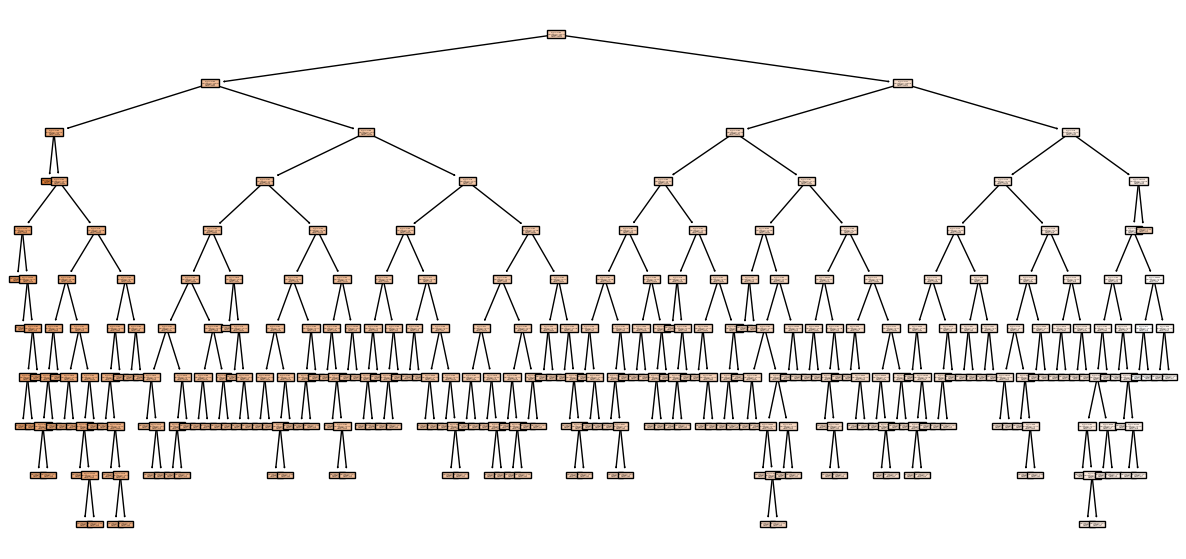

In [78]:
DTC=DecisionTreeRegressor()
DTC.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(DTC,filled=True)

In [79]:
pred = DTC.predict(X_test)
metrics.r2_score(y_test,pred)

0.9600161706067204

In [80]:
path = DTC.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas

In [81]:
alphalist = []
for i in range(len(ccp_alpha)):
    DTC = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    DTC.fit(X_train,y_train)
    alphalist.append(DTC)

In [82]:
alphalist

[DecisionTreeRegressor(),
 DecisionTreeRegressor(ccp_alpha=2.828030789094926e-16),
 DecisionTreeRegressor(ccp_alpha=2.828030789094926e-16),
 DecisionTreeRegressor(ccp_alpha=8.484092367284778e-16),
 DecisionTreeRegressor(ccp_alpha=1.1312123156379704e-15),
 DecisionTreeRegressor(ccp_alpha=1.1312123156379704e-15),
 DecisionTreeRegressor(ccp_alpha=1.1312123156379704e-15),
 DecisionTreeRegressor(ccp_alpha=2.262424631275941e-15),
 DecisionTreeRegressor(ccp_alpha=2.262424631275941e-15),
 DecisionTreeRegressor(ccp_alpha=4.524849262551882e-15),
 DecisionTreeRegressor(ccp_alpha=4.524849262551882e-15),
 DecisionTreeRegressor(ccp_alpha=6.7872738938278225e-15),
 DecisionTreeRegressor(ccp_alpha=1.8656716418317684e-05),
 DecisionTreeRegressor(ccp_alpha=2.487562188882782e-05),
 DecisionTreeRegressor(ccp_alpha=2.4875621889393428e-05),
 DecisionTreeRegressor(ccp_alpha=2.4875621889959032e-05),
 DecisionTreeRegressor(ccp_alpha=2.4875621889959032e-05),
 DecisionTreeRegressor(ccp_alpha=2.4875621890241836e-0

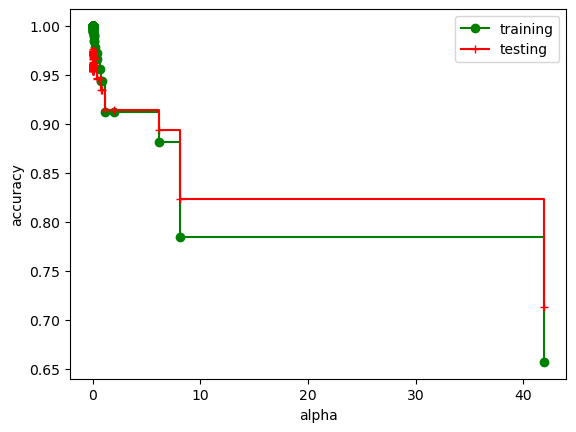

In [83]:
train_score = [alphalist[i].score(X_train,y_train) for i in range(len(alphalist))]
test_score = [alphalist[i].score(X_test,y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,marker='o',label='training',color='green',drawstyle='steps-post')
plt.plot(ccp_alpha,test_score,marker='+',label='testing',color='red',drawstyle='steps-post')
plt.legend()
plt.show()

In [85]:
clf=DecisionTreeRegressor(ccp_alpha=1)
clf.fit(X_train,y_train)
y_pred_DTC = clf.predict(X_test)
print(f' Decision Tree : {metrics.r2_score(y_test,y_pred_DTC)}')

rf=RandomForestRegressor(n_estimators=1000,ccp_alpha=1)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f' Random Forest : {metrics.r2_score(y_test,y_pred_rf)}')

 Decision Tree : 0.9157426110568476
 Random Forest : 0.953714064000949


In [86]:
totrain

Density  Abdomen  Chest  Weight    Hip
0     1.0708     85.2   93.1   70.11   94.5
1     1.0853     83.0   93.6   78.75   98.7
2     1.0414     87.9   95.8   70.00   99.2
3     1.0751     86.4  101.8   83.98  101.2
4     1.0340    100.0   97.3   83.75  101.9
..       ...      ...    ...     ...    ...
247   1.0736     83.6   89.2   61.02   88.8
248   1.0236    105.0  108.5   91.36  104.5
249   1.0328    111.5  111.1   84.89  101.7
250   1.0399    101.3  108.3   86.70   97.8
251   1.0271    108.5  112.4   94.32  107.1

[252 rows x 5 columns]

In [87]:
totrainlist = np.array(totrain)
predicted=[]

for i in range(len(totrainlist)):
    predicted.append(rf.predict([totrainlist[i]]))
    
totrain['Actual Result'] = test
totrain['Predicted'] = np.array(predicted)

totrain

Density  Abdomen  Chest  Weight    Hip  Actual Result  Predicted
0     1.0708     85.2   93.1   70.11   94.5           12.3  12.231211
1     1.0853     83.0   93.6   78.75   98.7            6.1   7.671246
2     1.0414     87.9   95.8   70.00   99.2           25.3  25.307260
3     1.0751     86.4  101.8   83.98  101.2           10.4   9.572107
4     1.0340    100.0   97.3   83.75  101.9           28.7  30.326887
..       ...      ...    ...     ...    ...            ...        ...
247   1.0736     83.6   89.2   61.02   88.8           11.0   9.933641
248   1.0236    105.0  108.5   91.36  104.5           33.6  31.906435
249   1.0328    111.5  111.1   84.89  101.7           29.3  30.749348
250   1.0399    101.3  108.3   86.70   97.8           26.0  25.657706
251   1.0271    108.5  112.4   94.32  107.1           31.9  31.884207

[252 rows x 7 columns]

[]

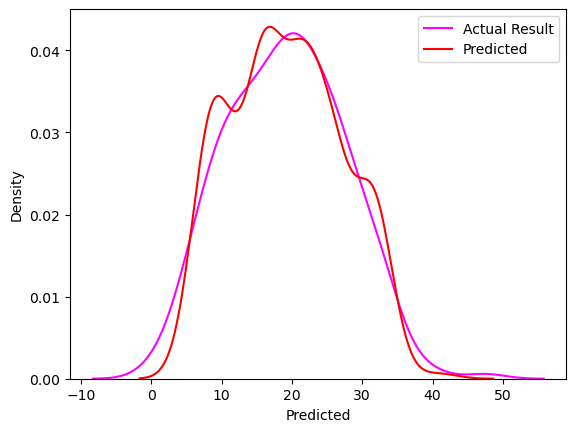

In [88]:
sns.distplot(totrain['Actual Result'],label='Actual Result',hist=False,color='magenta')
sns.distplot(totrain['Predicted'],label='Predicted',hist=False,color='red')
plt.legend()
plt.plot()

In [89]:
totrain = totrain.drop(['Actual Result','Predicted'], axis=1)

In [90]:
import pickle
file = open('bodyfatmodel1.pkl','wb')
pickle.dump(rf,file)
file.close()